## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_data = pd.merge(study_results, mouse_metadata, left_on='Mouse ID', right_on='Mouse ID', how='inner')
mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# mouse_metadata.head()

In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Checking the number of mice in the DataFrame.
# mouse_data.shape[0]

In [6]:
mouse_metadata.shape[0]

249

In [7]:
temp = mouse_data.groupby(['Mouse ID', 'Timepoint']).count()

In [8]:
temp[temp['Sex']>1]

Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID Timepoint                                                            
g989     0                           2                 2             2    2   
         5                           2                 2             2    2   
         10                          2                 2             2    2   
         15                          2                 2             2    2   
         20                          2                 2             2    2   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
g989     0                   2           2  
         5                   2           2  
         10                  2           2  
         15                  2           2  
         20                  2           2

In [9]:
study_results[study_results['Mouse ID'] == 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [10]:
study_results['Mouse ID']

0       b128
1       f932
2       g107
3       a457
4       c819
        ... 
1888    r944
1889    u364
1890    p438
1891    x773
1892    b879
Name: Mouse ID, Length: 1893, dtype: object

In [11]:
study_results['Mouse ID'] == 'f932'
#*It will look at all the Mouse ID, if it matches f932, it will give us True, otherwise gives False.

0       False
1        True
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [12]:
study_results[study_results['Mouse ID'] == 'g989']
#Then apply the above cell to the "study_results" data, so it only shows data for g989.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. *filter*to find/keep anything has more than 1 results (duplicated mice)
duplicate = set(mouse_data.groupby(['Mouse ID', 'Timepoint']).filter(lambda x: len(x)>1)['Mouse ID'])
#set function gives you a "set" of something, so it only gives one from the duplicate within that set/group.

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. *filter*to find/keep anything has more than 1 results (duplicated mice)
mouse_data.groupby(['Mouse ID', 'Timepoint']).filter(lambda x: len(x)>1)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data[mouse_data['Mouse ID'] != 'g989']
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [16]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data['Mouse ID']

0       b128
1       b128
2       b128
3       b128
4       b128
        ... 
1888    m601
1889    m601
1890    m601
1891    m601
1892    m601
Name: Mouse ID, Length: 1880, dtype: object

In [17]:
set(clean_mouse_data['Mouse ID'])

{'a203',
 'a251',
 'a262',
 'a275',
 'a366',
 'a401',
 'a411',
 'a444',
 'a457',
 'a492',
 'a520',
 'a577',
 'a644',
 'a685',
 'a699',
 'a788',
 'a818',
 'a897',
 'a963',
 'b128',
 'b313',
 'b447',
 'b487',
 'b559',
 'b742',
 'b759',
 'b879',
 'c139',
 'c264',
 'c282',
 'c302',
 'c326',
 'c402',
 'c458',
 'c559',
 'c580',
 'c757',
 'c758',
 'c766',
 'c819',
 'c832',
 'c895',
 'c927',
 'd133',
 'd164',
 'd251',
 'd474',
 'e213',
 'e227',
 'e291',
 'e476',
 'e584',
 'e662',
 'f129',
 'f234',
 'f278',
 'f345',
 'f394',
 'f436',
 'f545',
 'f932',
 'f966',
 'f993',
 'g107',
 'g288',
 'g296',
 'g316',
 'g497',
 'g558',
 'g570',
 'g791',
 'g867',
 'h246',
 'h333',
 'h428',
 'h531',
 'i177',
 'i334',
 'i386',
 'i477',
 'i557',
 'i635',
 'i669',
 'i738',
 'i901',
 'j119',
 'j235',
 'j246',
 'j296',
 'j365',
 'j755',
 'j913',
 'j984',
 'j989',
 'k210',
 'k382',
 'k403',
 'k483',
 'k510',
 'k603',
 'k754',
 'k804',
 'k862',
 'k894',
 'l215',
 'l264',
 'l471',
 'l490',
 'l509',
 'l558',
 'l661',
 

In [18]:
mice = len(set(clean_mouse_data['Mouse ID']))
# The number of mice in clean data
mice


248

In [19]:
m = {'Total Mice':[mice]}
df = pd.DataFrame(data=m)
df

,Total Mice
0,248


In [20]:
# mice_list = clean_dataframe ["Mouse ID"].unique()
# mice = len(mice_list)

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

clean_mouse_data.describe()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

#****agg is: anything that's to describe things about the group, such as mean, max, min, but not about individuals. 

clean_mouse_data.agg(['mean', 'median','max','min','std'])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
max,z969,45.000000,78.567014,4.000000,Zoniferol,Male,24.000000,30.000000
min,a203,0.000000,22.050126,0.000000,Capomulin,Female,1.000000,15.000000
mean,NaN,19.606383,50.435293,1.025000,NaN,NaN,12.757979,25.660106
median,NaN,20.000000,48.933454,1.000000,NaN,NaN,13.000000,27.000000
std,NaN,14.094238,8.914197,1.139971,NaN,NaN,7.181998,3.935064


## Bar Plots

In [23]:
bar_pandas = clean_mouse_data.groupby("Drug Regimen").count()
bar_pandas

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [24]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

Mice_count_per_drug = clean_mouse_data.groupby("Drug Regimen").count()["Mouse ID"]
data = pd.DataFrame({"Mice Count":Mice_count_per_drug})
data

,Mice Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


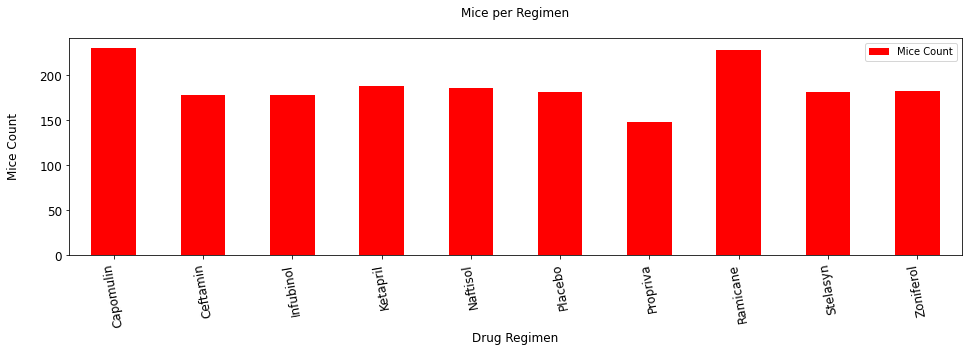

In [25]:
# Create bar plot
data.plot.bar(figsize=(16,4), color = "red", rot=100, fontsize=12)
plt.title("Mice per Regimen\n", fontsize=12)
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Mice Count\n", fontsize=12)
plt.show()

In [26]:
x_values = clean_mouse_data['Drug Regimen'].value_counts().index
x_values

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')

In [27]:
y_values= clean_mouse_data['Drug Regimen'].value_counts()
y_values

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [28]:
y_values= clean_mouse_data['Drug Regimen'].value_counts().values
y_values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

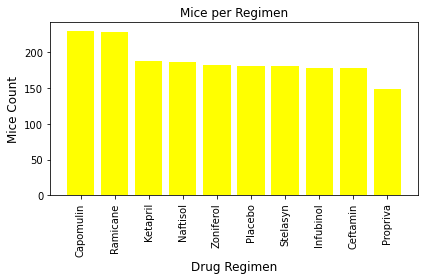

In [29]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_values = clean_mouse_data['Drug Regimen'].value_counts().index
y_values= clean_mouse_data['Drug Regimen'].value_counts().values

plt.bar(x_values,y_values, color='yellow')
plt.xticks(rotation = 90)
plt.title("Mice per Regimen")
plt.xlabel('Drug Regimen', fontsize = 12)
plt.ylabel('Mice Count', fontsize = 12)
plt.tight_layout()
plt.show()

## Pie Plots

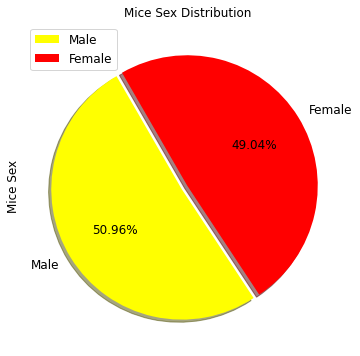

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

ex = (0.05,0)
y=clean_mouse_data['Sex'].value_counts()
y.plot(kind='pie', autopct= '%1.2f%%', figsize=(6,6), explode = ex, startangle = 120, fontsize = 12,
       shadow=True, colors=["yellow",'red'])
plt.legend(y.index, fontsize=12)
plt.title("Mice Sex Distribution")
plt.ylabel("Mice Sex", fontsize=12)
plt.show()

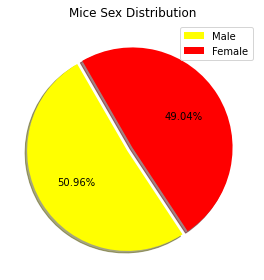

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

y = clean_mouse_data['Sex'].value_counts()
explode=(0.05,0)
plt.pie(y, autopct= '%1.2f%%', explode = explode, startangle = 120, shadow=True, colors=["yellow",'red'])
plt.legend(y.index)
plt.title("Mice Sex Distribution")
plt.tight_layout()
plt.show()

In [41]:
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin, Ramicane, Infubinol, and Ceftamin

most_promising = clean_mouse_data[clean_mouse_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

final_time_point = most_promising[most_promising['Timepoint']==45]
final_time_point




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
224,c139,45,72.226731,2,Infubinol,Male,11,28
243,y163,45,67.685569,3,Infubinol,Female,17,27
253,k483,45,66.196912,3,Infubinol,Female,20,30
279,z581,45,62.754451,3,Infubinol,Female,24,25
289,a251,45,65.525743,1,Infubinol,Female,21,25
460,j913,45,31.560470,1,Ramicane,Female,4,17
470,a411,45,38.407618,1,Ramicane,Male,3,22
480,a444,45,43.047543,0,Ramicane,Female,10,25
490,d251,45,37.311236,2,Ramicane,Female,8,19


In [57]:
#clean_mouse_data.groupby('Mouse ID').mean()
pd.set_option('display.max_rows', None)
#final_time_point.groupby(['Drug Regimen', 'Mouse ID']).mean()
final_time_point.groupby(['Drug Regimen']).mean()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,45.0,36.236114,1.476190,12.809524,19.857143
Ceftamin,45.0,64.132421,2.692308,13.538462,27.615385
Infubinol,45.0,65.755562,2.111111,18.555556,26.666667
Ramicane,45.0,34.955595,1.250000,10.050000,19.300000


In [61]:
clean_mouse_data[clean_mouse_data['Timepoint']==45].groupby('Drug Regimen').mean()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,45.0,36.236114,1.476190,12.809524,19.857143
Ceftamin,45.0,64.132421,2.692308,13.538462,27.615385
Infubinol,45.0,65.755562,2.111111,18.555556,26.666667
Ketapril,45.0,70.662958,3.363636,16.272727,27.727273
Naftisol,45.0,69.265506,2.538462,12.230769,27.153846
Placebo,45.0,68.084082,3.272727,11.818182,27.727273
Propriva,45.0,66.258529,2.571429,12.142857,27.142857
Ramicane,45.0,34.955595,1.250000,10.050000,19.300000
Stelasyn,45.0,68.438310,1.727273,12.727273,27.545455


<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

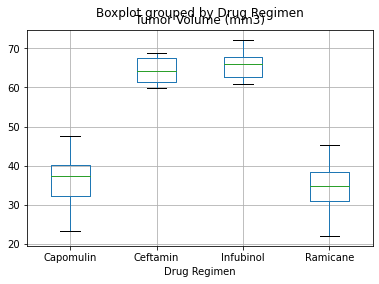

In [64]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


final_time_point.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = True)




## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

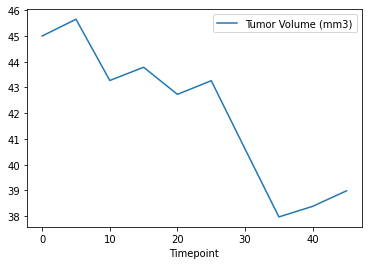

In [81]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


capomulin_treatment = clean_mouse_data[(clean_mouse_data['Drug Regimen']=='Capomulin') & (clean_mouse_data['Mouse ID']=='b128')]
capomulin_treatment

capomulin_treatment.plot( 'Timepoint' , 'Tumor Volume (mm3)' )



In [82]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

final_time_point[final_time_point['Drug Regimen']=='Capomulin']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
1690,r554,45,32.377357,3,Capomulin,Female,8,17
1700,s185,45,23.343598,1,Capomulin,Female,3,17
1710,b742,45,38.939633,0,Capomulin,Male,7,21
1720,x401,45,28.484033,0,Capomulin,Female,16,15
1730,l509,45,41.483008,3,Capomulin,Male,17,21
1740,s710,45,40.728578,1,Capomulin,Female,1,23
1754,u364,45,31.023923,3,Capomulin,Male,18,17
1764,j119,45,38.125164,1,Capomulin,Female,7,23
1774,v923,45,40.658124,2,Capomulin,Female,19,21


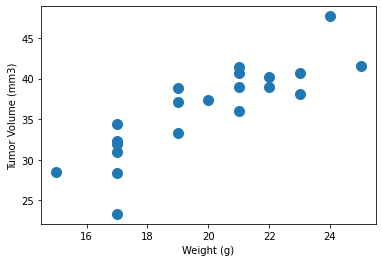

In [83]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#*** inside the "final_time_point" data set, select the "Drug Regimen"(which is from "final_time_point", and only select the "Drug Regimen" that is equal to "Capomulin")
Capomulin_mouse_weight_tumor_volume=final_time_point[final_time_point['Drug Regimen']=='Capomulin']

#*** create a scatter plot, using the "Weight" and "Tumor Volume" columns from "Capomulin_mouse_weight_tumor_volume" data set.
Capomulin_mouse_weight_tumor_volume.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)', s = 100);

## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
